<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DataAnalysis/%EA%B2%8C%EC%9E%84%EC%A0%84%EB%AC%B8%EA%B0%80_%EB%A6%AC%EB%B7%B0%EC%97%90_%EB%94%B0%EB%A5%B8_%ED%8C%90%EB%A7%A4%EB%9F%89_%EB%B0%8F_%EC%9C%A0%EC%A0%80%ED%8F%89%EC%A0%90_%EC%8A%A4%EC%BD%94%EC%96%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from math import sqrt

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# EDA 및 데이터 기초 통계 분석

In [4]:
# 결손 데이터를 데이터 프레임에서 지우기

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(16719, 16)

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
df.dropna(inplace=True)
df.shape

#거의 10000개를 날렸네 ㄷㄷ;

(6825, 16)

In [9]:
# 수치형 데이터 먼저 확인해보자

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [10]:
# 히스토그램을 그려보자
# 이상치 때문에 그리기 어렵다면 제거하면서 진행하자

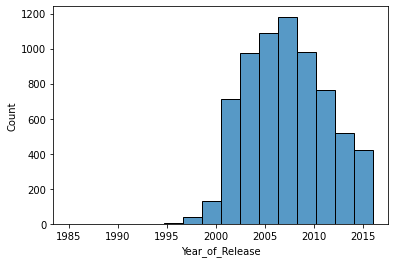

In [11]:
sns.histplot(x='Year_of_Release', data=df, bins=16)

# 1985년에도 표본이 있긴 있나봄
# 대체적으로 2000년대 중후반에 발매가 많이됨

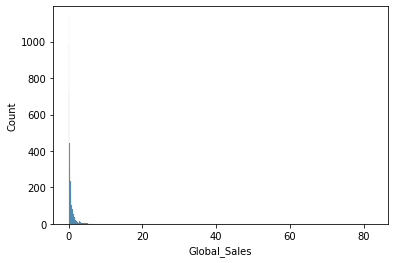

In [12]:
sns.histplot(x='Global_Sales', data=df)

# 얘도 아웃라이어가 있나보넹??
# 러그플랏으로 봐보자

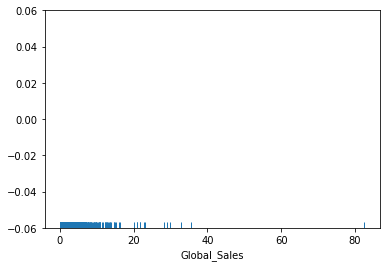

In [13]:
sns.rugplot(x='Global_Sales', data=df)

# 보면 하나가 저 멀리에 떡하니 있는게 보이네?? 80근처에?? 저게 뭐지??

In [14]:
df[df['Global_Sales']>60] # 이 문법 기억해야겠다 
# df[] 이므로 데이터프레임을 가져와라라는 의미인데 어떠한 데이터를 가져와라 인가
# df['Global_sales']    <- 'Global_sales' 컬럼 중에서 >60인행을 의미하는 거같음

# wii sport가 아주 대박이 났구만요

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [15]:
df[df['Global_Sales']>30] 


# 대체로 wii가 많이 팔렸네용??

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [16]:
# 일단 wii sports는 걸러야 한다. ... 머신러닝에서 이해할 수 있는 수준이 아님 걍 설명안되는 대박이 난거임

In [17]:
g1 = df['Global_Sales'].quantile(0.99)
print(g1)
#상위 1프로만 잘라도 7m 인데 ㅋㅋ

7.167600000000002


In [18]:
df['Global_Sales'].quantile(0.01)
#하위는 안잘라도 될듯

0.01

In [19]:
df = df[df['Global_Sales']<g1]

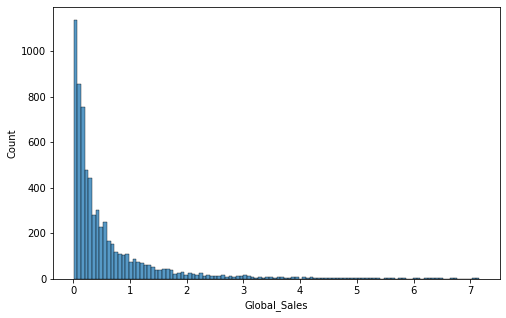

In [20]:
# 이제 히스토그램을 다시 그려보자

plt.figure(figsize=(8,5))
sns.histplot(x='Global_Sales', data=df)

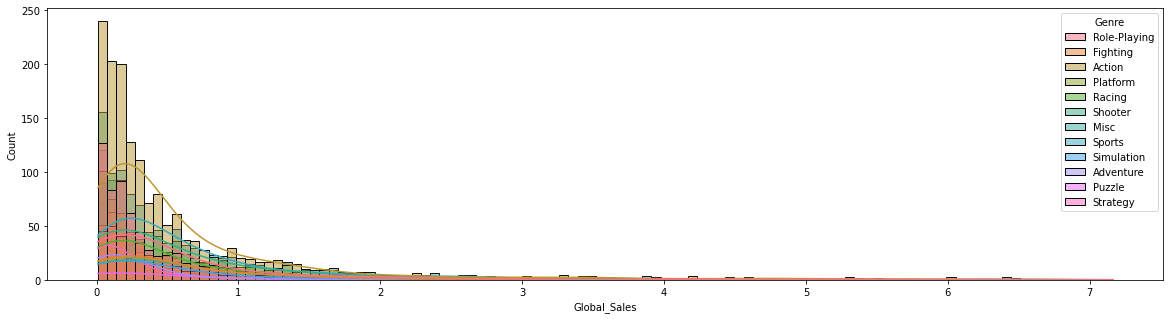

In [21]:
# 장르별로 다뤄볼까

plt.figure(figsize=(20,5))
sns.histplot(x='Global_Sales', hue ='Genre', kde=True, data=df)

# 범주가 많으면 겹쳐서 보기가 힘들긴하네
# 나중에 박스플롯으로 봐야 겠당


In [22]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

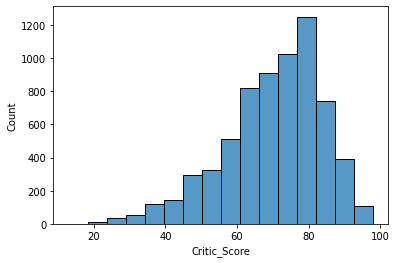

In [23]:
sns.histplot( x = 'Critic_Score', data=df, bins = 16)

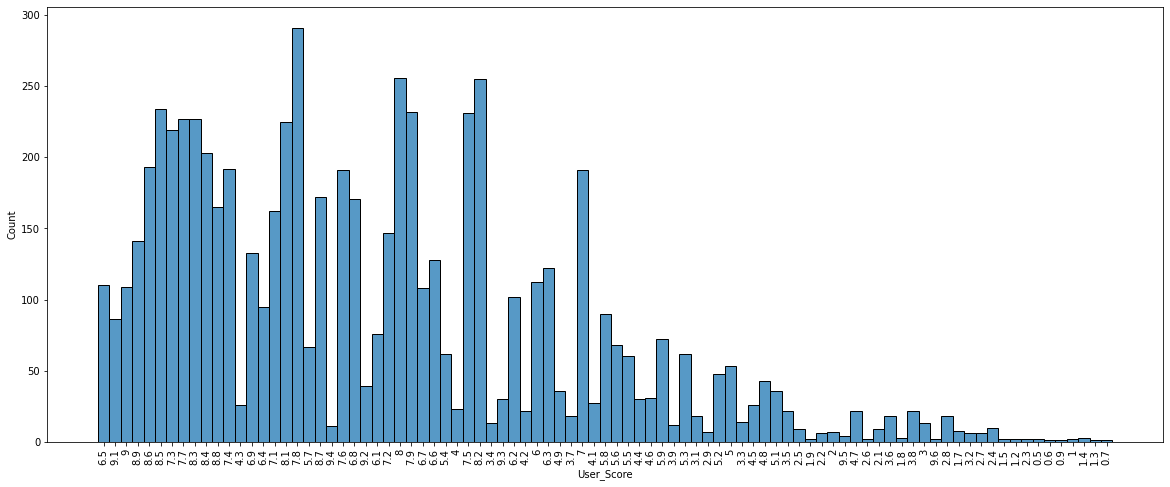

In [24]:
plt.figure(figsize=(20,8))
sns.histplot( x = 'User_Score', data=df, bins = 16)
plt.xticks(rotation = 90)
plt.show()

#이거 보니까 수치형으로 안들어 가있네...

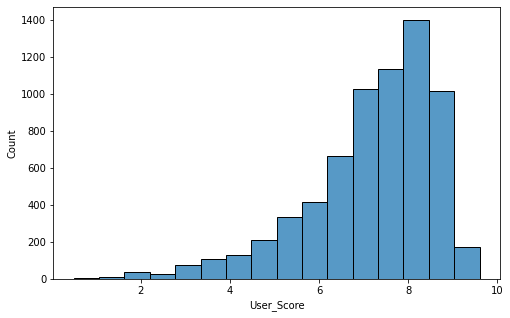

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=df['User_Score'].apply(float), bins=16)
plt.show()

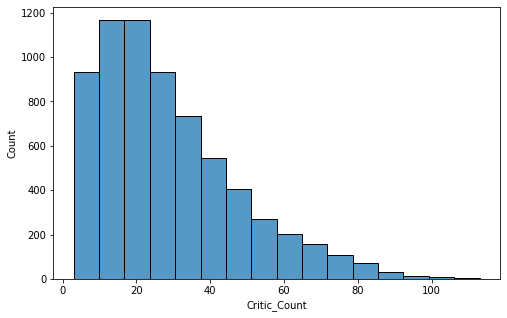

In [26]:
plt.figure(figsize=(8,5))
sns.histplot( x = 'Critic_Count', data=df, bins = 16)
plt.show()

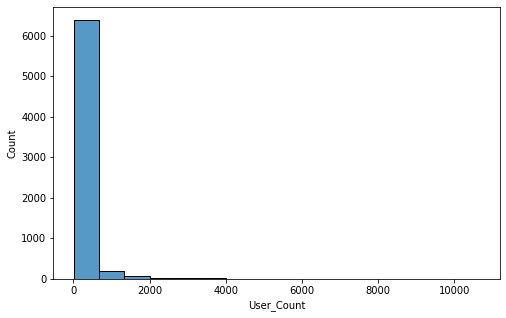

In [27]:
plt.figure(figsize=(8,5))
sns.histplot( x = 'User_Count', data=df, bins = 16)
plt.show()

#뭐여 아웃라이어 있나보네 러그플롯으로 한번 봐보자

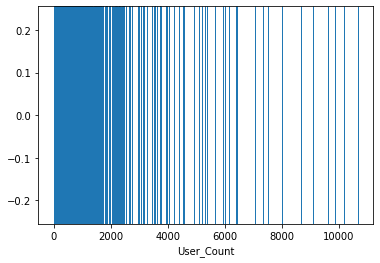

In [28]:
sns.rugplot(x='User_Count', data=df, height=1)
# 이상치가 멀리 펼쳐져있군

In [29]:
uc = df['User_Count'].quantile(0.99)
print(uc)

2454.8999999999996


In [30]:
df = df[df.User_Count<uc]

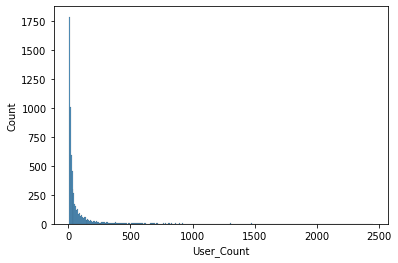

In [31]:
sns.histplot(x = 'User_Count', data=df)

#뭐여 결측값을 처리 했는데도 이모양이네  한번 더 해봐야겟다

In [32]:
uc = df['User_Count'].quantile(0.97)
print(uc)

911.5599999999977


In [33]:
df = df[df.User_Count<uc]

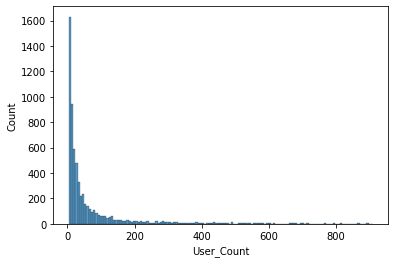

In [34]:
sns.histplot(x = 'User_Count', data=df)

# 더 자르고 싶지만 더 자르면 안될것같다

In [35]:
# 수치형 데이터와 전체 판매량의 jointplot 분석해보기

In [36]:
df['User_Score'] = df['User_Score'].apply(float)

In [37]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<Figure size 576x360 with 0 Axes>

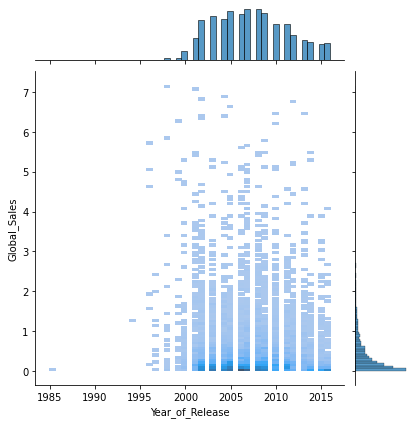

In [38]:
plt.figure(figsize=(8,5))
sns.jointplot(x = 'Year_of_Release', y='Global_Sales', data=df,kind='hist')
plt.show()

# 큰 상관성은 없는듯..?

<Figure size 576x360 with 0 Axes>

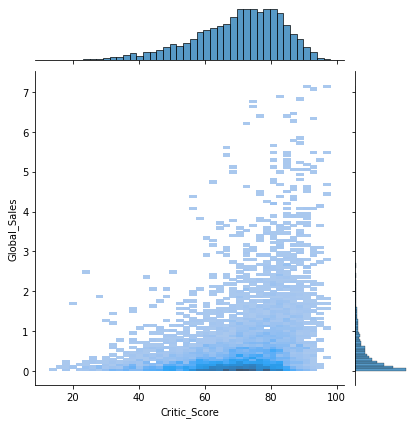

In [39]:
plt.figure(figsize=(8,5))
sns.jointplot(x = 'Critic_Score', y='Global_Sales', data=df,kind='hist')
plt.show()

# 전문가평점이 보장해주진 않지만 낮으면 나오질 않는 다는 것을 보여줌 

<Figure size 576x360 with 0 Axes>

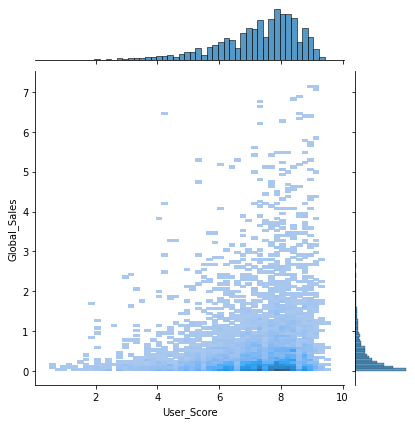

In [40]:
plt.figure(figsize=(8,5))
sns.jointplot(x = 'User_Score', y='Global_Sales', data=df,kind='hist')
plt.show()

#유저스코어는 위와 비슷해보임

<Figure size 576x360 with 0 Axes>

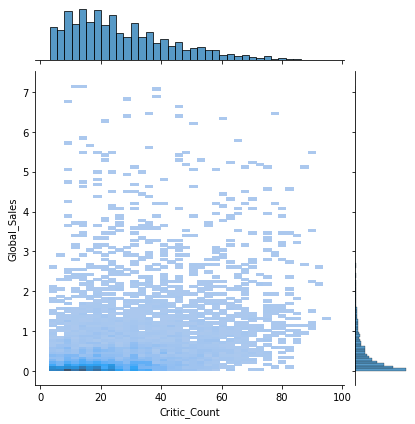

In [41]:
plt.figure(figsize=(8,5))
sns.jointplot(x = 'Critic_Count', y='Global_Sales', data=df,kind='hist')
plt.show()

# 많은 상관성이 보이진 않음

<Figure size 576x360 with 0 Axes>

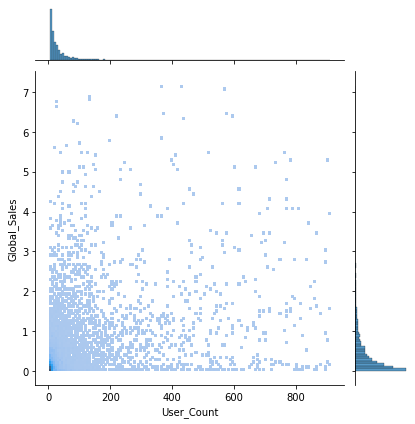

In [42]:
plt.figure(figsize=(8,5))
sns.jointplot(x = 'User_Count', y='Global_Sales', data=df,kind='hist')
plt.show()

# 많은 상관성이 보이진 않음

In [43]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [44]:
# 범주형 데이터의 범주별 전체 판매량의 box plot 분석

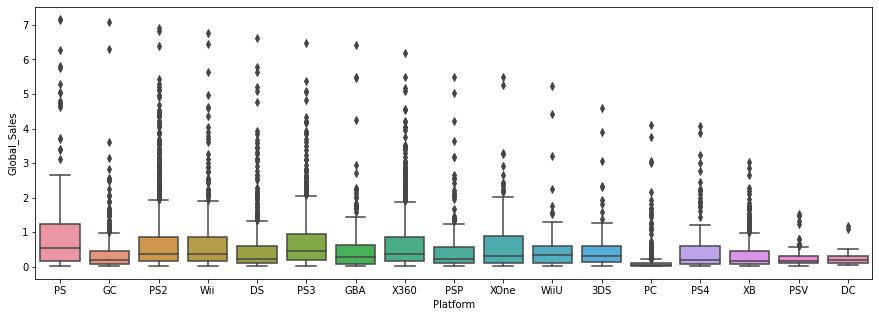

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Platform', y='Global_Sales', data=df)
plt.show()

# 플레이스테이션이 평균이 가장 높군
# PS1, PS2, PS4 WII도 잘나갔었군

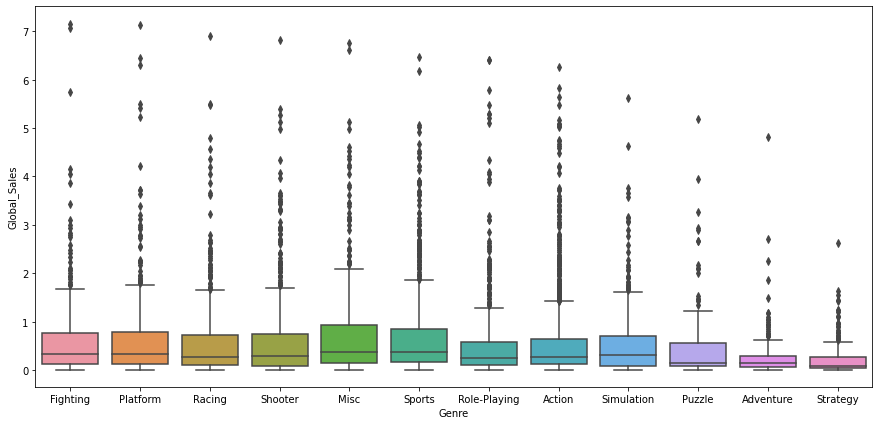

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'Genre', y='Global_Sales', data=df)
plt.show()

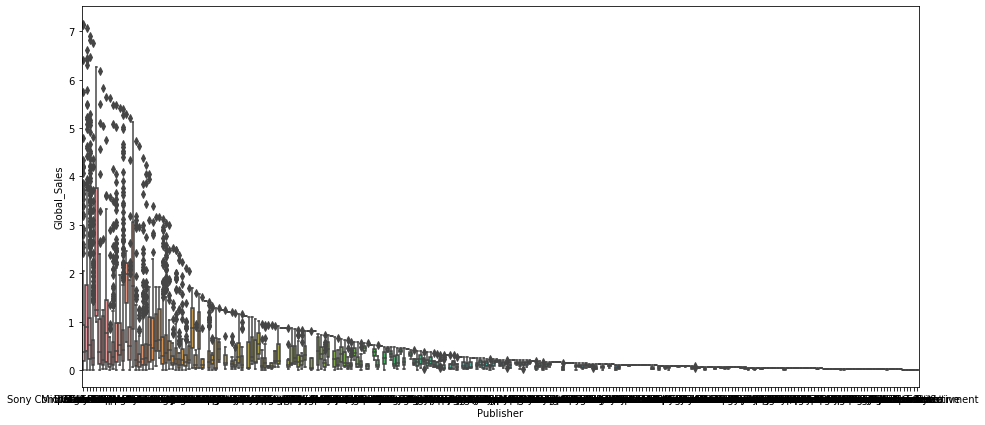

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'Publisher', y='Global_Sales', data=df)
plt.show()

#유통사마다  편차가 심해보임

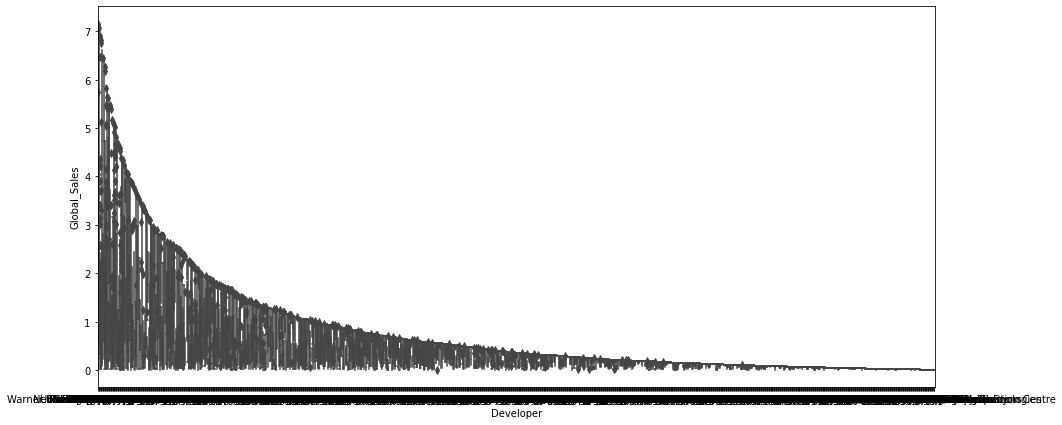

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'Developer', y='Global_Sales', data=df)
plt.show()

# 얘도 많이 OTHERS로 묶어서 해야될듯


In [54]:
# 전문가 평점과 사용자 평점 분석하기
# - 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# - 별도의 데이터 프레임을 구성하여 박스플랏으로 비교

In [55]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

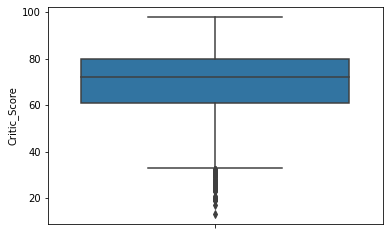

In [56]:
sns.boxplot(y='Critic_Score', data=df)

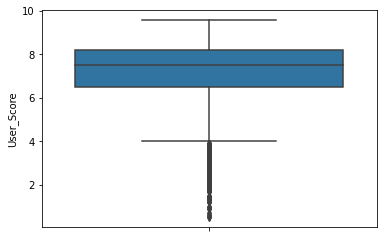

In [57]:
sns.boxplot(y='User_Score', data=df)

In [58]:
# 양옆으로 배치하려면 새 df를 만들어야 댐

In [59]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [60]:
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [64]:
user_score = df[['User_Score']].copy()  * 10
user_score.rename({'User_Score' : 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'users'

In [65]:
user_score

,Score,ScoreBy
106,91.0,users
109,89.0,users
111,91.0,users
113,86.0,users
114,85.0,users
...,...,...
16667,24.0,users
16677,88.0,users
16696,76.0,users
16700,58.0,users


In [66]:
scores = pd.concat([critic_score, user_score], axis=0 )
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,users
16677,88.0,users
16696,76.0,users
16700,58.0,users


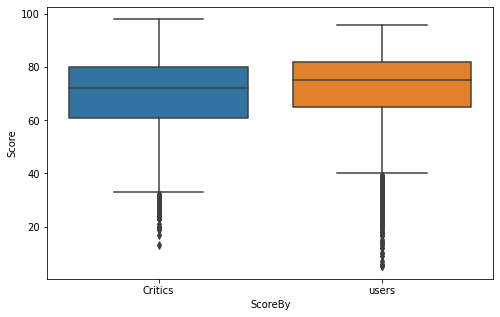

In [69]:
# 이제 박스플롯을 그려보자
plt.figure(figsize=(8,5))
sns.boxplot(x='ScoreBy', y='Score', data= scores)
plt.show()

In [71]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [70]:
# 장르별로 유저평점과 전문가평점이 어떻게 다른지도 한번 보자

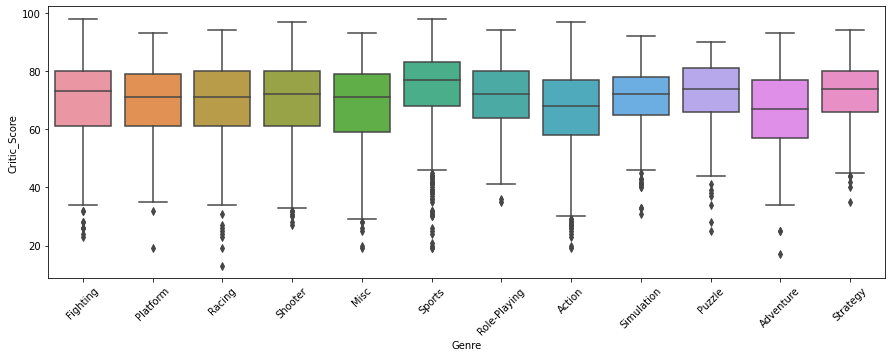

In [73]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Genre', y='Critic_Score', data= df)
plt.xticks(rotation = 45)
plt.show()

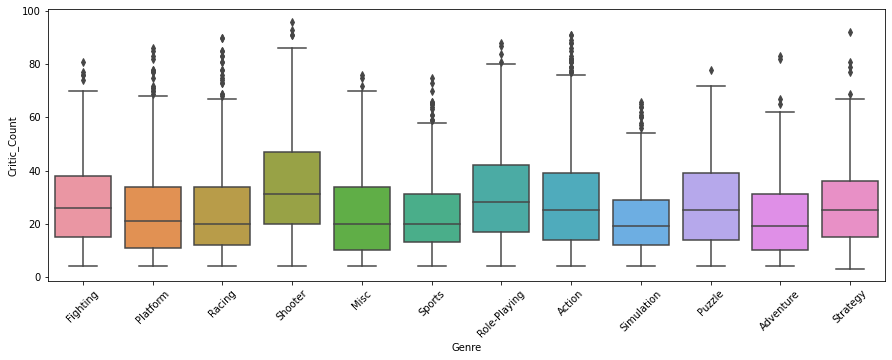

In [75]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Genre', y='Critic_Count', data= df)
plt.xticks(rotation = 45)
plt.show()

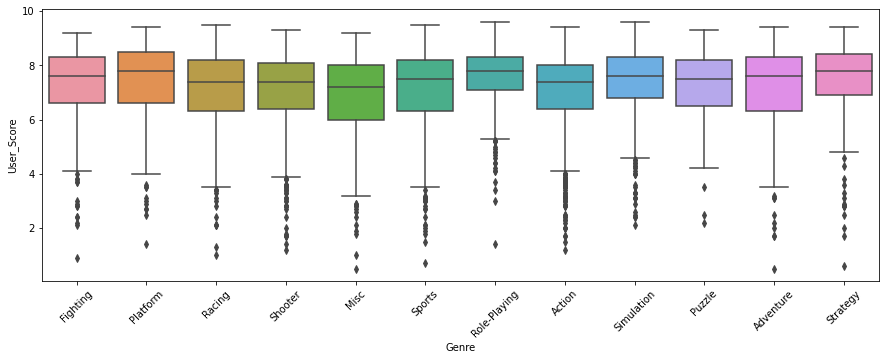

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Genre', y='User_Score', data= df)
plt.xticks(rotation = 45)
plt.show()

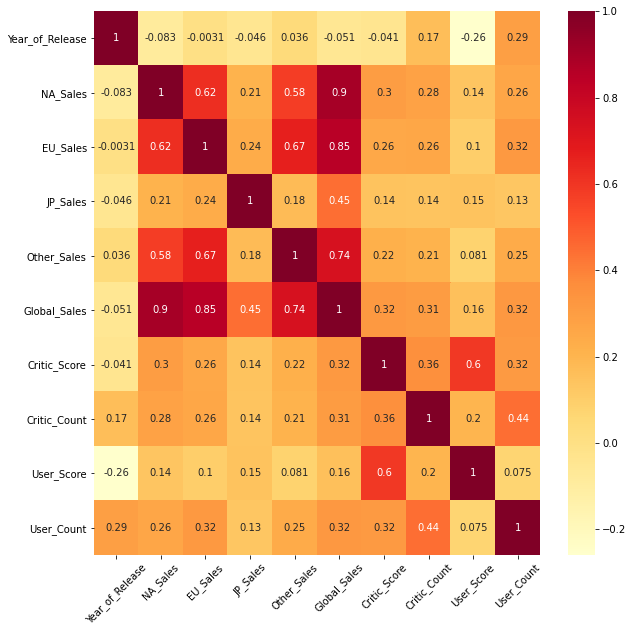

In [79]:
# 수치형 데이터 간 상관성 시각화
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.xticks(rotation=45)
plt.show()

# 모델학습

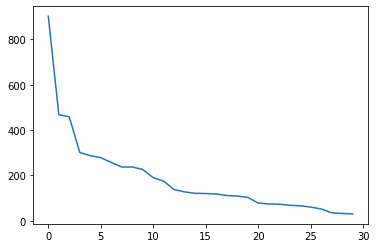

In [91]:
# 범주형 데이터 중 범주가 너무 적은경우를 others로 대체하자
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb))[:30], pb[:30])

In [92]:
# 20개로 자르자!

505 Games                     78
Disney Interactive Studios    74
Deep Silver                   73
LucasArts                     68
Acclaim Entertainment         66
                              ..
EA Games                       1
Encore                         1
SNK                            1
Flashpoint Games               1
Hudson Entertainment           1
Name: Publisher, Length: 233, dtype: int64

In [94]:
df['Publisher'][20:]

162                          Nintendo
163                            Capcom
165              Take-Two Interactive
166                          Nintendo
169             Universal Interactive
                     ...             
16667                        NewKidCo
16677                    Midway Games
16696    Konami Digital Entertainment
16700                       Destineer
16706                         Unknown
Name: Publisher, Length: 6467, dtype: object

In [97]:
df['Publisher'] = df['Publisher'].apply(lambda s : s if s not in pb[20:] else 'others')

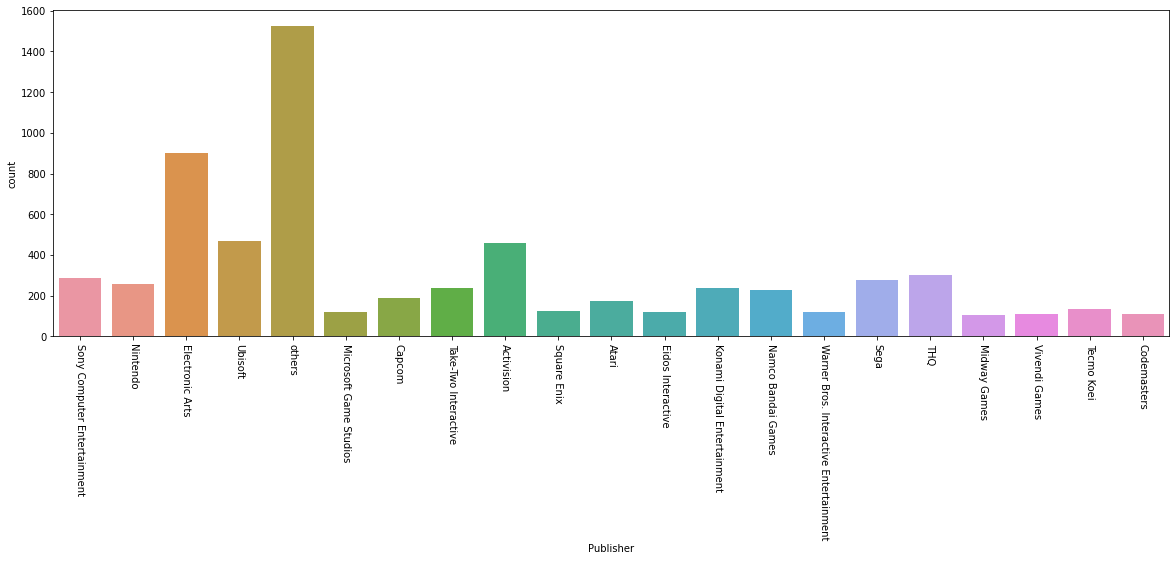

In [110]:
plt.figure(figsize=(20,6))
sns.countplot( x = 'Publisher', data=df)
plt.xticks(rotation=-90)
plt.show()

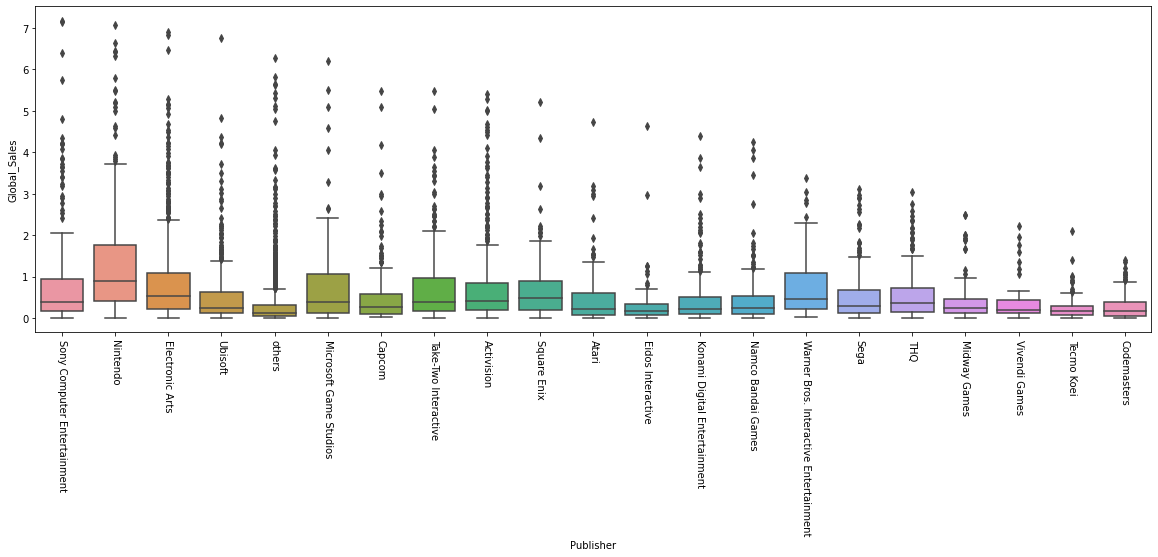

In [113]:
plt.figure(figsize=(20,6))
sns.boxplot( x = 'Publisher', y='Global_Sales' ,data=df)
plt.xticks(rotation=-90)
plt.show()

#퍼블리셔 별로 평균차이가 있는걸알수있음

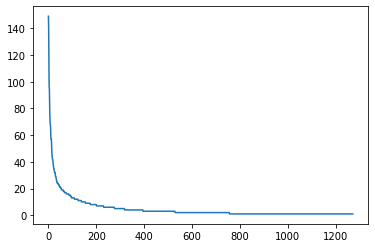

In [116]:
dev = df.Developer.value_counts()
plt.plot(range(len(dev)),dev)

# 보면 1200개가 넘는 개발사가 있는데 그중에 소수가 독점하고 있음을 알 수 있음.

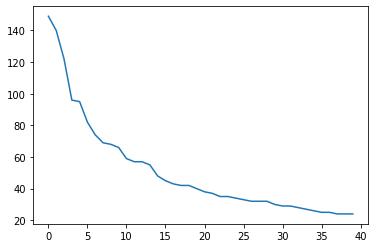

In [118]:
plt.plot(range(len(dev))[:40],dev[:40])

In [119]:
df['Developer'] = df['Developer'].apply(lambda s : s if s not in dev[20:] else 'others')

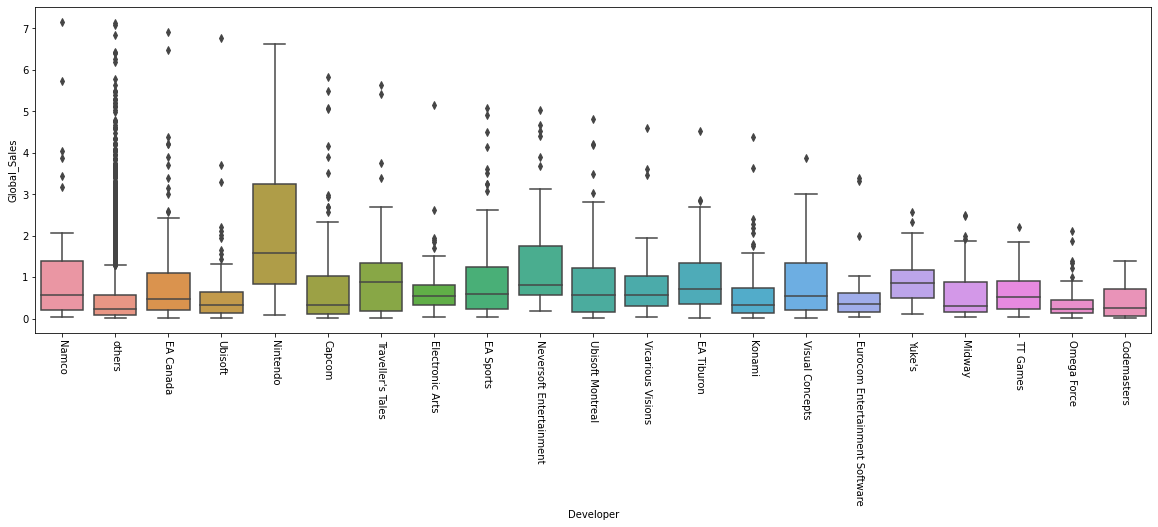

In [120]:
plt.figure(figsize=(20,6))
sns.boxplot( x = 'Developer', y='Global_Sales' ,data=df)
plt.xticks(rotation=-90)
plt.show()

# 닌텐도가 평균적으로 잘나가는구만

In [121]:
# 범주형 데이터를 원핫인코딩 형식으로 바꾸자

In [122]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [124]:
X_cat = df[['Platform','Genre','Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [125]:
# 전체 판매량 추정을 위한 입출력 데이터 구성

In [126]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [127]:
X_num = df[[
            'Year_of_Release', 'Critic_Score','Critic_Count'
]] #나머지는 발매 후에 영향이 있는 것이기 때문이다.

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat ], axis=1)
y = df['Global_Sales']

In [128]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,1.944152,-0.704478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237912,1.577371,-0.874440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514757,1.650727,0.598567,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.917163,0.655221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273706,1.357302,0.088680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
# 학습데이터, 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [130]:
# XGBOOST 모델 생성/ 학습하기

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[15:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [131]:
# LinearRegression model 생성/ 학습하기

In [132]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 모델학습결과 및 평가

In [134]:
pred_xgb = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred_xgb))
print(sqrt(mean_squared_error(y_test,pred_xgb)))

0.39659319130408194
0.6821165671897874


In [135]:
pred_lr = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred_lr))
print(sqrt(mean_squared_error(y_test,pred_lr)))

0.4435623723861831
0.7033240396642875


In [136]:
# 실제값과 예측값의 scatter plot 분석

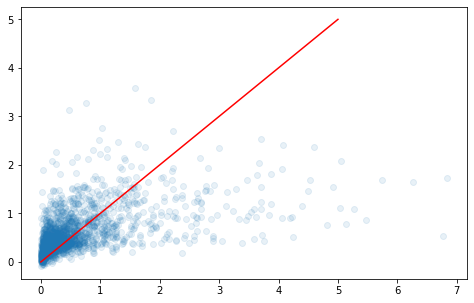

In [141]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, pred_xgb,alpha=0.1)
plt.plot([0,5],[0,5],'r-')
plt.show()

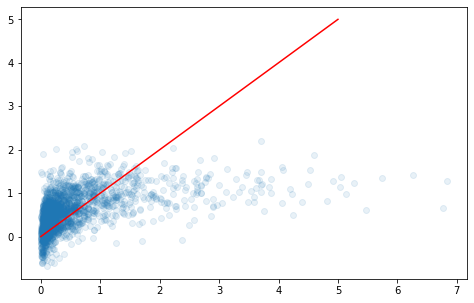

In [142]:
 plt.figure(figsize=(8,5))
plt.scatter(y_test, pred_lr,alpha=0.1)
plt.plot([0,5],[0,5],'r-')
plt.show()

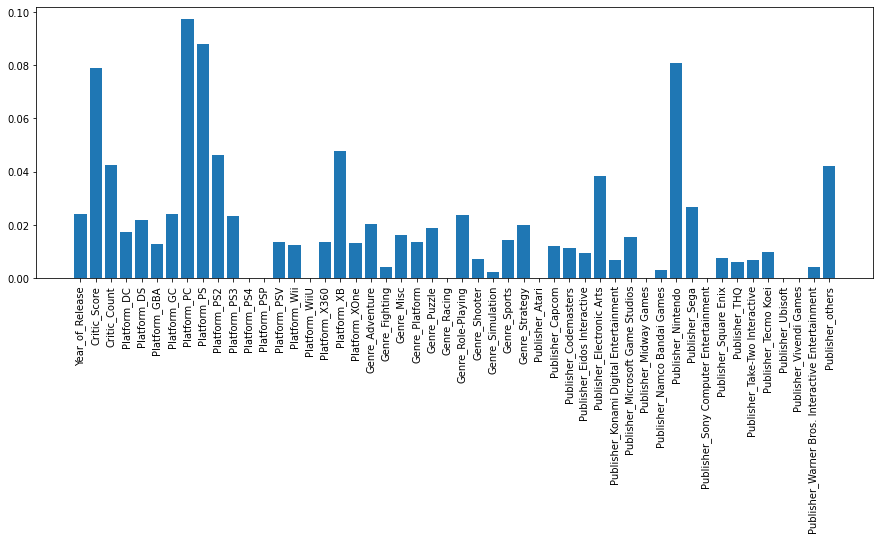

In [144]:
# xgboost의 feature importances 확인
plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 유저평점 Regression model 학습하기

In [145]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [146]:
X_num = df[[
            'Year_of_Release', 'Critic_Score','Critic_Count'
]] #나머지는 발매 후에 영향이 있는 것이기 때문이다.

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat ], axis=1)
y = df['User_Score']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [148]:
# XGBOOST 모델 생성/ 학습하기

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[16:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [149]:
# LinearRegression model 생성/ 학습하기

In [150]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# 모델학습결과 및 평가

In [152]:
pred_xgb = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred_xgb))
print(sqrt(mean_squared_error(y_test,pred_xgb)))

0.74224728947734
1.0158512368202421


In [153]:
pred_lr = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred_lr))
print(sqrt(mean_squared_error(y_test,pred_lr)))

0.779957137091311
1.0532062590705695


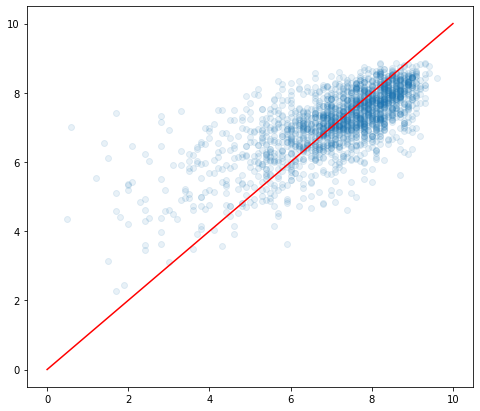

In [156]:
plt.figure(figsize=(8,7))
plt.scatter(y_test, pred_xgb,alpha=0.1)
plt.plot([0,10],[0,10],'r-')
plt.show()

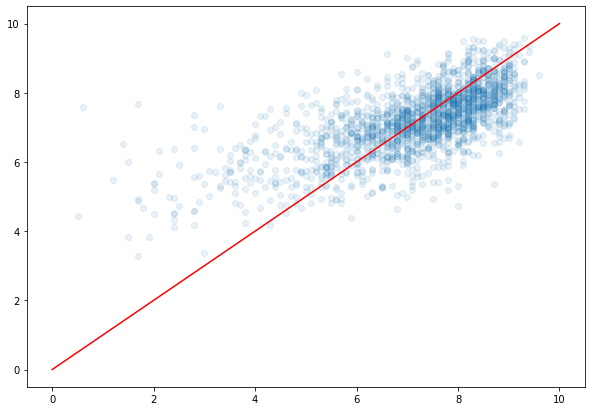

In [158]:
 plt.figure(figsize=(10,7))
plt.scatter(y_test, pred_lr,alpha=0.1)
plt.plot([0,10],[0,10],'r-')
plt.show()

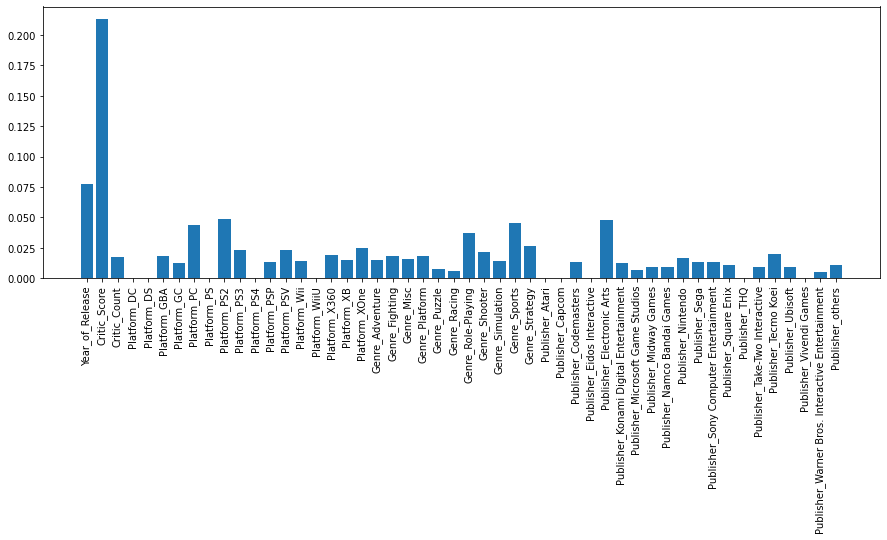

In [161]:
# xgboost의 feature importances 확인
plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 전문가 평이 가장 큰 중요한 피쳐라고 알 수 있음